<a href="https://colab.research.google.com/github/AniLeo-01/Dry-Bean-Classification-using-AutoML/blob/AniLeo-01-Notebook/Dry_bean_classification_using_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/v3ltuqwnavqt32olfk2pydddx6fvfj')

In [ ]:
df.head()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13611 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

So there are no null instances

In [ ]:
print(df['Class'].value_counts())
print("No. of classes:", len(df['Class'].value_counts()))

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64
No. of classes: 7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


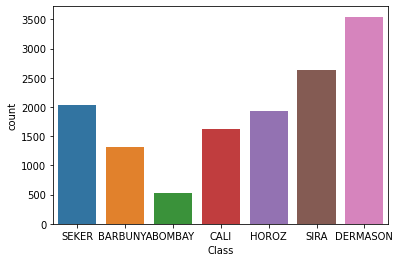

In [ ]:
import seaborn as sns
sns.countplot(df['Class'])

There is a class imbalance in BOMBAY class of beans

# Using Auto-Sklearn 2.0 

In [ ]:
!pip3 install auto-sklearn


In [ ]:
X, y = df.iloc[:, 1:-1], df['Class']

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
automl = AutoSklearn2Classifier(time_left_for_this_task = 600 )
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_hat))

Accuracy score 0.934469585659712


In [ ]:
print("F1 Score: ",f1_score(y_test, y_hat, average='macro'))

F1 Score:  0.9447491383406131


In [ ]:
AutoSklearn2Classifier.leaderboard(automl)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
23,1,0.06,mlp,0.069945,60.013782
8,2,0.02,mlp,0.076607,60.010911
17,3,0.74,sgd,0.117653,4.517186
18,4,0.02,sgd,0.187206,6.964312
9,5,0.16,sgd,0.633915,3.931871


In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94       330
      BOMBAY       1.00      1.00      1.00       130
        CALI       0.93      0.95      0.94       408
    DERMASON       0.92      0.94      0.93       887
       HOROZ       0.96      0.95      0.95       482
       SEKER       0.96      0.96      0.96       507
        SIRA       0.89      0.87      0.88       659

    accuracy                           0.93      3403
   macro avg       0.95      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403

